# DATA PREPARATION

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Import data

In [2]:
df=pd.read_csv("ParisHousing.csv")

In [3]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


# DATA EXPLORATION

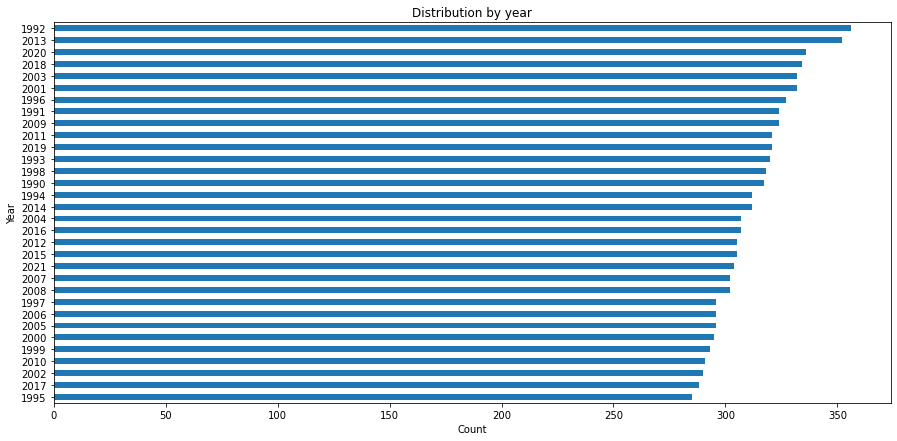

In [4]:
fig, ax=plt.subplots(figsize=(15,7))
df["made"].value_counts().sort_values(ascending=True).plot(kind="barh", ax=ax)
plt.xlabel("Count")
plt.ylabel("Year")
plt.title("Distribution by year");

In [5]:
df['price'] = df['price'].round()
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559082.0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085990.0
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [6]:
df['price'] = df['price'].astype(int)

In [7]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559082
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085990
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       10000 non-null  int64
 1   numberOfRooms      10000 non-null  int64
 2   hasYard            10000 non-null  int64
 3   hasPool            10000 non-null  int64
 4   floors             10000 non-null  int64
 5   cityCode           10000 non-null  int64
 6   cityPartRange      10000 non-null  int64
 7   numPrevOwners      10000 non-null  int64
 8   made               10000 non-null  int64
 9   isNewBuilt         10000 non-null  int64
 10  hasStormProtector  10000 non-null  int64
 11  basement           10000 non-null  int64
 12  attic              10000 non-null  int64
 13  garage             10000 non-null  int64
 14  hasStorageRoom     10000 non-null  int64
 15  hasGuestRoom       10000 non-null  int64
 16  price              10000 non-null  int32
dtypes: int32(1), 

In [9]:
sf=df.drop(columns=["price"]).corr()

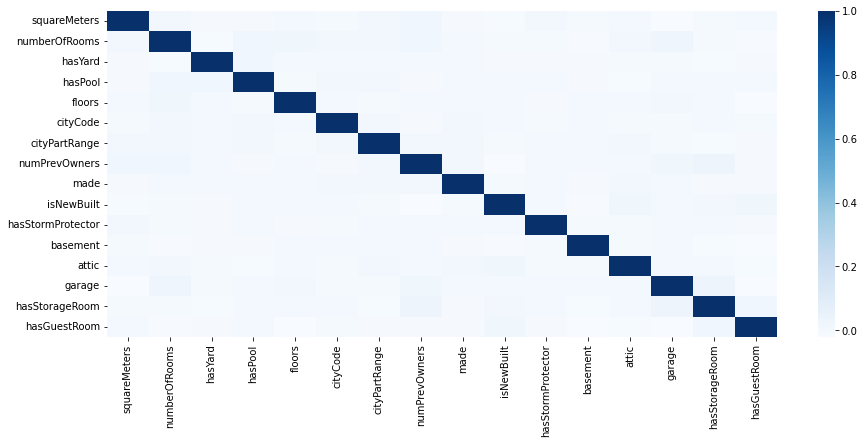

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(sf, cmap="Blues", ax=ax);

### We can see that there is no strong linear relationship from the heatmap.That is,some has  a very weak or negligible linear relationship between the variables being compared. 

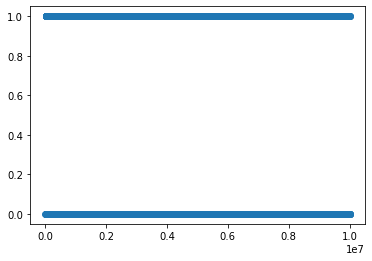

In [11]:
plt.scatter(df['price'],df['isNewBuilt']);

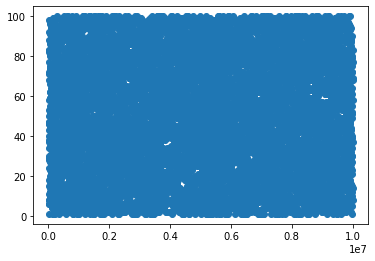

In [12]:
plt.scatter(df['price'], df['floors']);

### From the two above plots, there is weak correlations of the variables with the target vector(price)

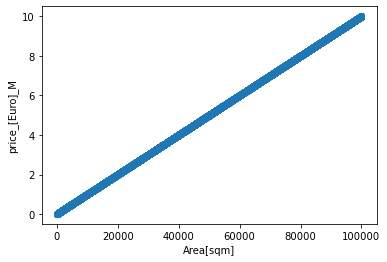

In [13]:
plt.scatter(df['squareMeters'], df['price']/1e6)
plt.xlabel("Area[sqm]")
plt.ylabel("price_[Euro]_M");

### There is a strong linear relationship between the size and price of the property. This implies, the higher the size of the property, the higher the price

In [14]:
sf=df.drop(columns=["price"])

In [15]:
# function to calculate multicollinearity and store it in dataframe
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [16]:
#calculate the VIF
calc_vif(sf)

,variables,VIF
0,squareMeters,4.007454
1,numberOfRooms,4.064582
2,hasYard,2.037212
3,hasPool,1.989521
4,floors,4.034013
5,cityCode,4.000543
6,cityPartRange,4.685937
7,numPrevOwners,4.748642
8,made,38.092158
9,isNewBuilt,1.999563


In [17]:
#drop the variables with high multicollinearity
df.drop(columns=["made"],inplace=True)

In [18]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,0,1,4313,9005,956,0,7,7559082
1,80771,39,1,1,98,39381,8,6,1,0,3653,2436,128,1,2,8085990
2,55712,58,0,1,19,34457,6,8,0,0,2937,8852,135,1,9,5574642
3,32316,47,0,0,6,27939,10,4,0,1,659,7141,359,0,3,3232561
4,70429,19,1,1,90,38045,3,7,1,0,8435,2429,292,1,4,7055052


# SPLIT THE DATA

In [19]:
X=df.drop(columns=["price"])
y=df["price"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# print splitted data shapes
print("X_train_shape:",X_train.shape)
print("X_test_shape:",X_test.shape)
print("y_train_shape:",y_train.shape)
print("y_test_shape:",y_test.shape)

X_train_shape: (8000, 15)
X_test_shape: (2000, 15)
y_train_shape: (8000,)
y_test_shape: (2000,)


# BUILD MODEL

## Baseline

In [22]:
y_train_mean=y_train.mean()
baseline=[y_train_mean] * len(y_train)
mae_baseline=mean_absolute_error(y_train,baseline)
print("y_train_mean is:", round(y_train_mean))
print("mae_baseline is:", round(mae_baseline))

y_train_mean is: 4964092
mae_baseline is: 2463812


In [23]:
# instantiate model
model = LinearRegression()

In [24]:
# fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# predict y_train
y_pred=model.predict(X_train)

In [26]:
# predict y_test
y_test_pred=model.predict(X_test)

In [27]:
print("y_pred_training is:",round(mean_absolute_error(y_train,y_pred),2))
print("y_pred_test is:",round(mean_absolute_error(y_test,y_test_pred),2))

y_pred_training is: 1470.49
y_pred_test is: 1509.63


# COMMUNICATION

# y(price) = mx1 + mx2 + mx3 + ...mxn + c

###  But since we have more than more features, we decided to use for loop

In [28]:
intercept=model.intercept_
coefficients = model.coef_
feature_names = X_train.columns

In [29]:
#load the features importance into a series
feat_imp =pd.Series(coefficients,index=feature_names)
feat_imp.head()

squareMeters      100.000089
numberOfRooms       0.268283
hasYard          2993.668085
hasPool          2991.924559
floors             54.458663
dtype: float64

In [30]:
# fro loop to calculate our linear model
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 339.65
+ (100.0 * squareMeters)
+ (0.27 * numberOfRooms)
+ (2993.67 * hasYard)
+ (2991.92 * hasPool)
+ (54.46 * floors)
+ (-0.0 * cityCode)
+ (50.47 * cityPartRange)
+ (2.72 * numPrevOwners)
+ (127.83 * isNewBuilt)
+ (102.6 * hasStormProtector)
+ (-0.01 * basement)
+ (-0.01 * attic)
+ (0.1 * garage)
+ (42.27 * hasStorageRoom)
+ (-6.31 * hasGuestRoom)


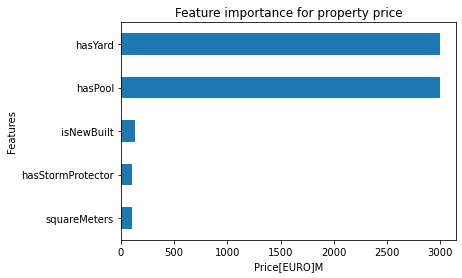

In [31]:
feat_imp.sort_values(key=abs).tail(5).plot(kind="barh")
plt.xlabel("Price[EURO]M")
plt.ylabel("Features")
plt.title("Feature importance for property price");